## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data File

In [2]:
df = pd.read_csv('Overall Data - Consolidated.csv') # Use Data that includes Conversion = 0% at t0.
df

,Condition,Sty wt%,Sty:AIBN,Residence_Time,Conversion
0,1,0.3,150,0,0.000000
1,2,0.3,100,0,0.000000
2,3,0.3,50,0,0.000000
3,4,0.4,150,0,0.000000
4,5,0.4,100,0,0.000000
...,...,...,...,...,...
130,23,0.4,250,120,27.908477
131,24,0.4,200,120,28.170813
132,25,0.5,300,120,25.428060
133,26,0.5,250,120,30.682166


In [3]:
# Remove Condition 15
df_ = df[df['Condition'] != 15]
df_ = df_.drop(['Condition'], axis=1)
X = df_.iloc[:,:3]
y = df_.iloc[:,-1]

In [4]:
# Inspect X
X

,Sty wt%,Sty:AIBN,Residence_Time
0,0.3,150,0
1,0.3,100,0
2,0.3,50,0
3,0.4,150,0
4,0.4,100,0
...,...,...,...
130,0.4,250,120
131,0.4,200,120
132,0.5,300,120
133,0.5,250,120


In [5]:
# Inspect y
y

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
130    27.908477
131    28.170813
132    25.428060
133    30.682166
134    35.261377
Name: Conversion, Length: 130, dtype: float64

## Train Test Split and Feature Scaling

In [6]:
# Train - Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X.columns

Index(['Sty wt%', 'Sty:AIBN', 'Residence_Time'], dtype='object')

In [8]:
# Feature and Target Scaling
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(np.array(y_train).reshape(-1,1)), columns = ['Conversion'])
y_test = pd.DataFrame(scaler_y.transform(np.array(y_test).reshape(-1,1)), columns = ['Conversion'])

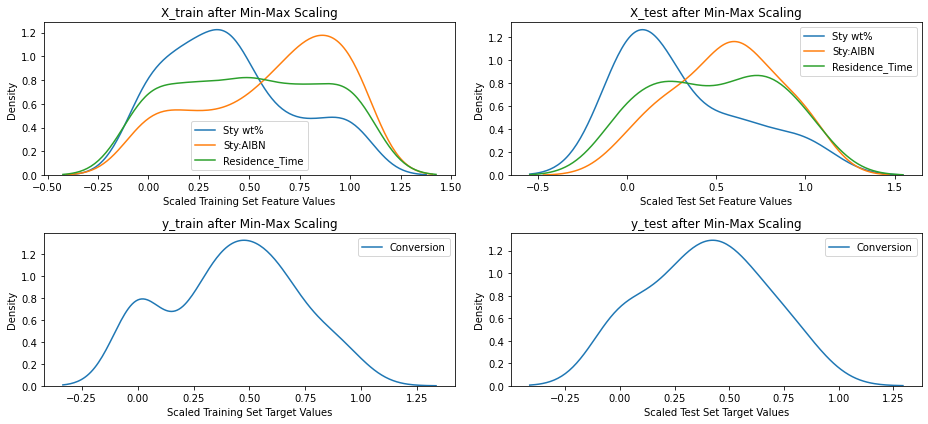

In [9]:
# Visualize Scaled Feature and Target Range using Density Plots

plt.figure(figsize=(13,6))

plt.subplot(2,2,1)
plt.title('X_train after Min-Max Scaling')
plt.xlabel('Scaled Training Set Feature Values')
plt.ylabel('Density')

for feature in X_train:
    sns.kdeplot(X_train[feature], label=str(feature))
    plt.legend()
    
plt.subplot(2,2,2)
plt.title('X_test after Min-Max Scaling')
plt.xlabel('Scaled Test Set Feature Values')
plt.ylabel('Density')

for feature in X_test:
    sns.kdeplot(X_test[feature], label=str(feature))
    plt.legend()
    
plt.subplot(2,2,3)
plt.title('y_train after Min-Max Scaling')
plt.xlabel('Scaled Training Set Target Values')
plt.ylabel('Density')

for target in y_train:
    sns.kdeplot(y_train[target], label=str(target))
    plt.legend()

plt.subplot(2,2,4)
plt.title('y_test after Min-Max Scaling')
plt.xlabel('Scaled Test Set Target Values')
plt.ylabel('Density')

for target in y_test:
    sns.kdeplot(y_test[target], label=str(target))
    plt.legend()    

plt.tight_layout()
plt.show()

## Define Actual vs. Predicted Plotting Function

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

def plot(regressor_name, y_train, y_pred_train, y_test, y_pred_test):

    plt.figure(figsize = (14,6))

    ax1 = plt.subplot(121)

    plt.scatter(y_train,y_pred_train)
    
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--', lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)

    rmse_train = np.round(mean_squared_error(y_train,y_pred_train, squared=False),3)
    r2_train = np.round(r2_score(y_train,y_pred_train),3)
    
    plt.title(regressor_name+ ' \nTraining Set' '\nRMSE: '+str(rmse_train) + '\n$R^{2}$: ' + str(r2_train),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)

    ax2 = plt.subplot(122)
    
    plt.scatter(y_test,y_pred_test)
    
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    rmse_test = np.round((mean_squared_error(y_test,y_pred_test, squared=False)),3)
    r2_test = np.round(r2_score(y_test,y_pred_test),3)
    
    plt.title(regressor_name+' \nTest Set' '\nRMSE: '+str(rmse_test) + '\n$R^{2}$: ' + str(r2_test),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
    
    plt.tight_layout()
    plt.show()

In [11]:
# Create empty dictionaries to store regressor scores.

train_rmse = {}
train_r2 = {}

test_rmse = {}
test_r2 = {}

## Linear Regression

In [12]:
# Linear Regression; No Hyperparameters, CV not executed.

# Import Regressor
from sklearn.linear_model import LinearRegression

# Instantiation and Fitting
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Training and Test Scores
print(f'Training Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Training Score (RMSE) = 0.114
Training Score (R Squared) = 0.836

Test Score (RMSE) = 0.085
Test Score (R Squared) = 0.891


In [13]:
# Store Linear Regression Scores

train_rmse['Linear Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Linear Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Linear Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Linear Regression'] = r2_score(y_test,y_pred_test)

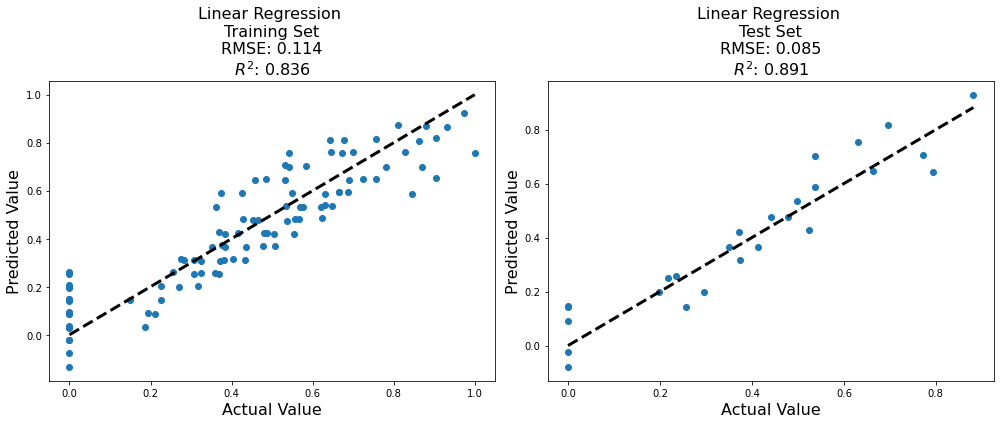

In [14]:
# Plot Predicted Value vs. Actual Value for Linear Regressor

plot('Linear Regression', y_train, y_pred_train, y_test, y_pred_test)

## Lasso Regression

In [15]:
# Lasso Regression

# Import Regressor and GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Instantiate Regressor
lasso = Lasso(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = lasso,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True, # Hyperparameters automatically refit onto regressor.
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Lasso(alpha=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05}
Best Mean CV Test Score: 0.045926859900814423

Training Score (RMSE) = 0.208
Training Score (R Squared) = 0.451

Test Score (RMSE) = 0.185
Test Score (R Squared) = 0.492


In [16]:
# Store Lasso Regression Scores

train_rmse['Lasso Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Lasso Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Lasso Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Lasso Regression'] = r2_score(y_test,y_pred_test)

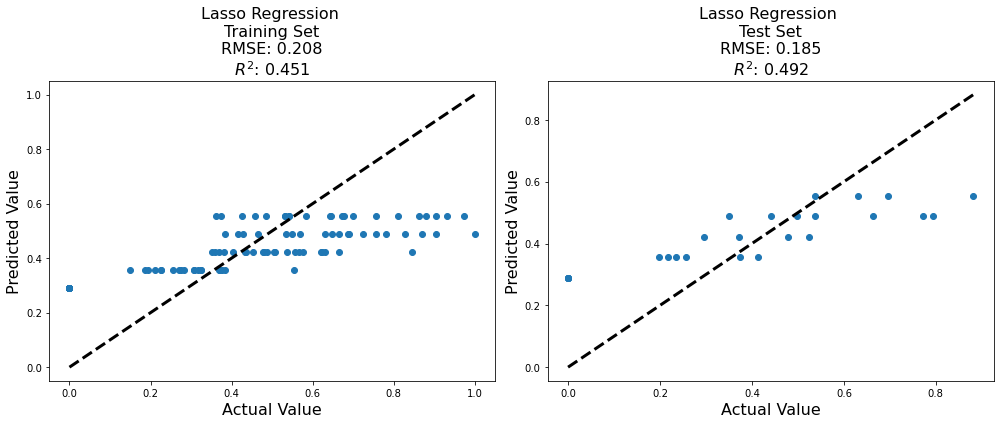

In [17]:
# Plot Predicted Value vs. Actual Value for Lasso Regressor

plot('Lasso Regression', y_train, y_pred_train, y_test, y_pred_test)

## Ridge Regression

In [18]:
# Ridge Regression

# Import Regressor
from sklearn.linear_model import Ridge

# Instantiate Regressor
ridge = Ridge(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = ridge,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1,
                         cv = 5,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : Ridge(alpha=0.2, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.2}
Best Mean CV Test Score: 0.014288461357220648

Training Score (RMSE) = 0.114
Training Score (R Squared) = 0.835

Test Score (RMSE) = 0.085
Test Score (R Squared) = 0.893


In [19]:
# Store Ridge Regression Scores

train_rmse['Ridge Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Ridge Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Ridge Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Ridge Regression'] = r2_score(y_test,y_pred_test)

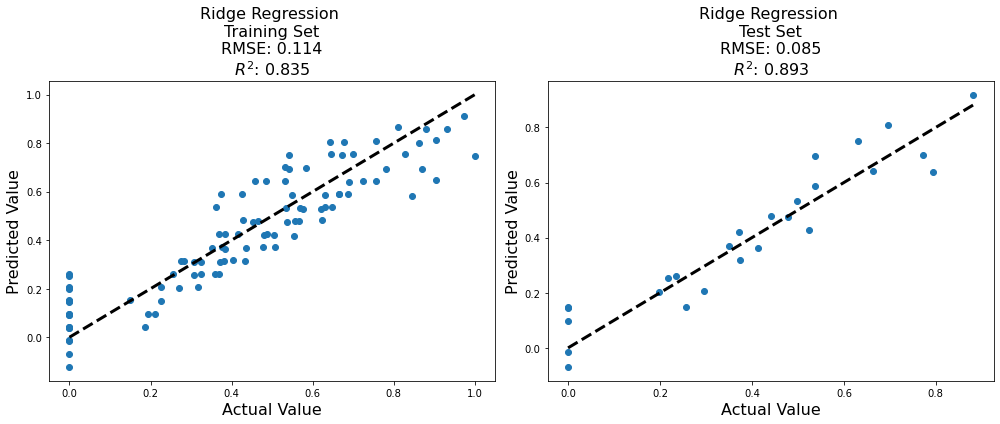

In [20]:
# Plot Predicted Value vs. Actual Value for Ridge Regressor

plot('Ridge Regression', y_train, y_pred_train, y_test, y_pred_test)

## Elastic Net Regression

In [21]:
# Elastic Net Regression

# Import Regressor
from sklearn.linear_model import ElasticNet

# Instantiate Regressor
enet = ElasticNet(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05),
             'l1_ratio' : np.arange(0.05, 1.05, 0.05)}

# Execute Grid Search
regressor = GridSearchCV(estimator = enet,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)
Best Hyperparameter Combination: {'alpha': 0.05, 'l1_ratio': 0.05}
Best Mean CV Test Score: 0.021811384740092903

Training Score (RMSE) = 0.143
Training Score (R Squared) = 0.74

Test Score (RMSE) = 0.112
Test Score (R Squared) = 0.812


In [22]:
# Store Elastic Net Regression Scores

train_rmse['Elastic Net Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Elastic Net Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Elastic Net Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Elastic Net Regression'] = r2_score(y_test,y_pred_test)

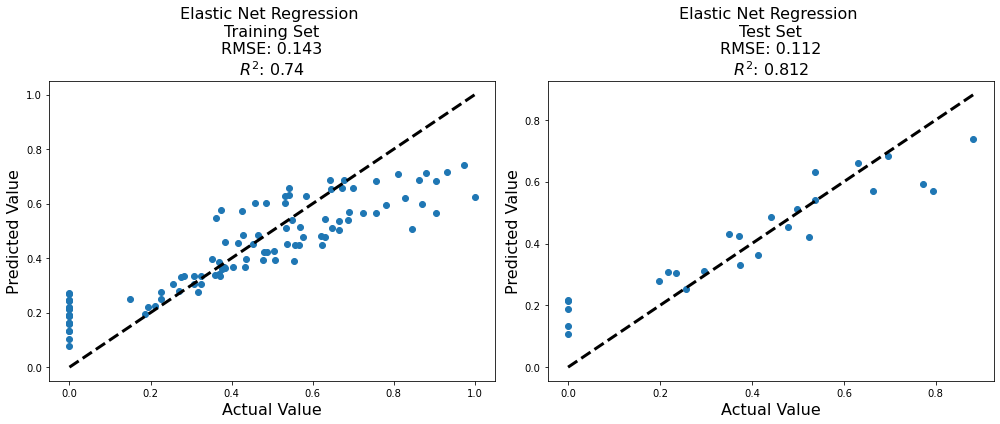

In [23]:
# Plot Predicted Value vs. Actual Value for Elastic Net Regressor

plot('Elastic Net Regression', y_train, y_pred_train, y_test, y_pred_test)

## K Nearest Neighbors Regression

In [24]:
# K Nearest Neighbors Regression

# Import Regressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate Regressor
knn_reg = KNeighborsRegressor()

# Define Parameter Grid for subsequent Grid Search
param_grid = {'n_neighbors' : np.arange(1, 11, 1),
             'weights' : ['distance', 'uniform'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : np.arange(30, 110, 10),
             'p' : np.arange(1, 11, 1)}

# Execute Grid Search
regressor = GridSearchCV(estimator = knn_reg,
                        param_grid = param_grid,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        refit = True,
                        return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : KNeighborsRegressor(algorithm='brute', n_neighbors=4, p=1, weights='distance')
Best Hyperparameter Combination: {'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best Mean CV Test Score: 0.0054635771488077845

Training Score (RMSE) = 0.0
Training Score (R Squared) = 1.0

Test Score (RMSE) = 0.047
Test Score (R Squared) = 0.967


In [25]:
# Store K Nearest Neighbors Regression Scores

train_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['K Nearest Neighbors Regression'] = r2_score(y_train,y_pred_train)

test_rmse['K Nearest Neighbors Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['K Nearest Neighbors Regression'] = r2_score(y_test,y_pred_test)

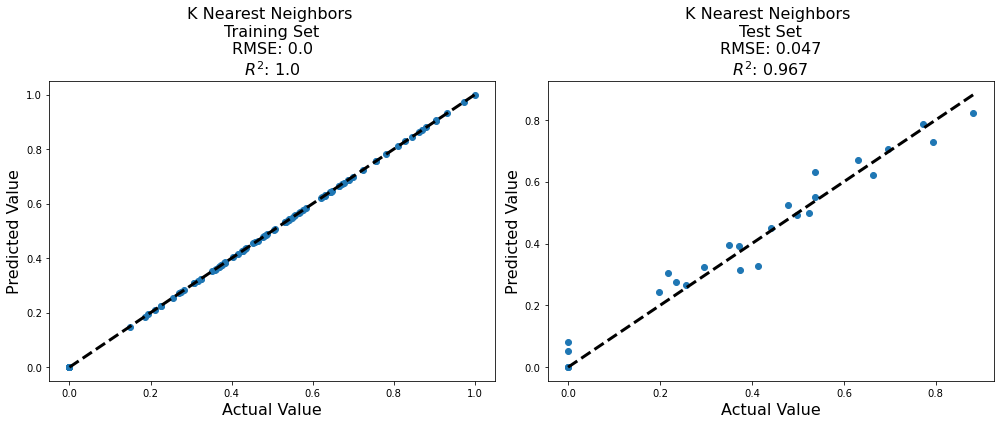

In [26]:
# Plot Predicted Value vs. Actual Value for K Nearest Neighbors Regressor

plot('K Nearest Neighbors', y_train, y_pred_train, y_test, y_pred_test)

## Support Vector Regression

In [27]:
# Support Vector Regression

# Import Regressor
from sklearn.svm import SVR

# Instantiate Regressor
svr_reg = SVR()

# Define Parameter Grid for subsequent Grid Search
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], # 'precomputed' requires X to be a square matrix.
              'C' : np.arange(0.5, 5.5, 0.5),
              'epsilon' : np.arange(0, 0.5, 0.1),
              'degree' : np.arange(1, 6, 1),
              'gamma' : ['scale', 'auto']}

# Execute Grid Search
regressor = GridSearchCV(estimator = svr_reg,
                        param_grid = param_grid,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        refit = True,
                        return_train_score = True)

# Fit Regressor
regressor.fit(X_train, np.ravel(y_train))

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : SVR(C=5.0, degree=1, epsilon=0.0)
Best Hyperparameter Combination: {'C': 5.0, 'degree': 1, 'epsilon': 0.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best Mean CV Test Score: 0.0031556358751743106

Training Score (RMSE) = 0.027
Training Score (R Squared) = 0.991

Test Score (RMSE) = 0.054
Test Score (R Squared) = 0.956


In [28]:
# Store Support Vector Regression Scores

train_rmse['Support Vector Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Support Vector Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Support Vector Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Support Vector Regression'] = r2_score(y_test,y_pred_test)

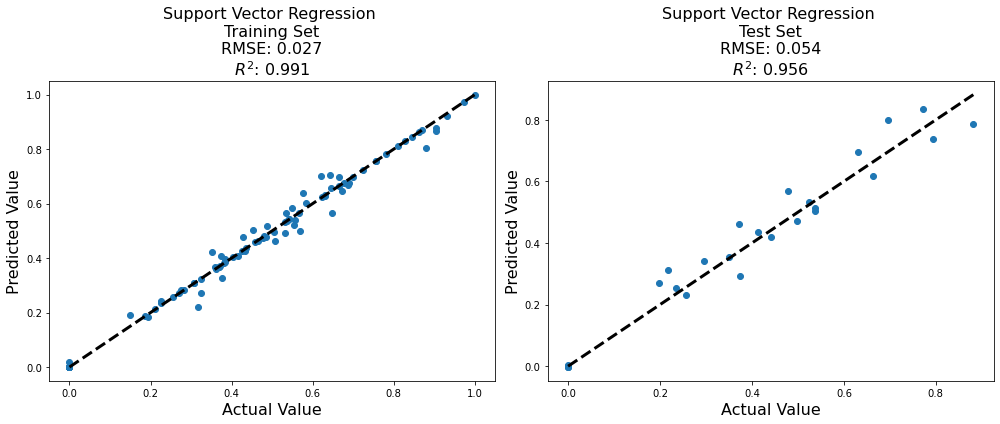

In [29]:
# Plot Predicted Value vs. Actual Value for Support Vector Regressor

plot('Support Vector Regression', y_train, y_pred_train, y_test, y_pred_test)

## Decision Tree Regression

In [30]:
# Decision Tree Regression

# Import Regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate Regressor
dt = DecisionTreeRegressor(random_state = 42)

# Define Parameter Grid for subsequent Grid Search
param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
              'splitter' : ['best', 'random'],
              'max_depth' : np.arange(1, 11, 1),
              'min_samples_leaf' : np.arange(1, 11, 1)} # 'min_samples_split' causes errors, excluded.
             
# Execute Grid Search
regressor = GridSearchCV(estimator = dt,
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         n_jobs = -1,
                         refit = True,
                         return_train_score = True)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : DecisionTreeRegressor(max_depth=9, random_state=42, splitter='random')
Best Hyperparameter Combination: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 1, 'splitter': 'random'}
Best Mean CV Test Score: 0.006158865676516063

Training Score (RMSE) = 0.0
Training Score (R Squared) = 1.0

Test Score (RMSE) = 0.061
Test Score (R Squared) = 0.944


In [31]:
# Store Decision Tree Regression Scores

train_rmse['Decision Tree Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Decision Tree Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Decision Tree Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Decision Tree Regression'] = r2_score(y_test,y_pred_test)

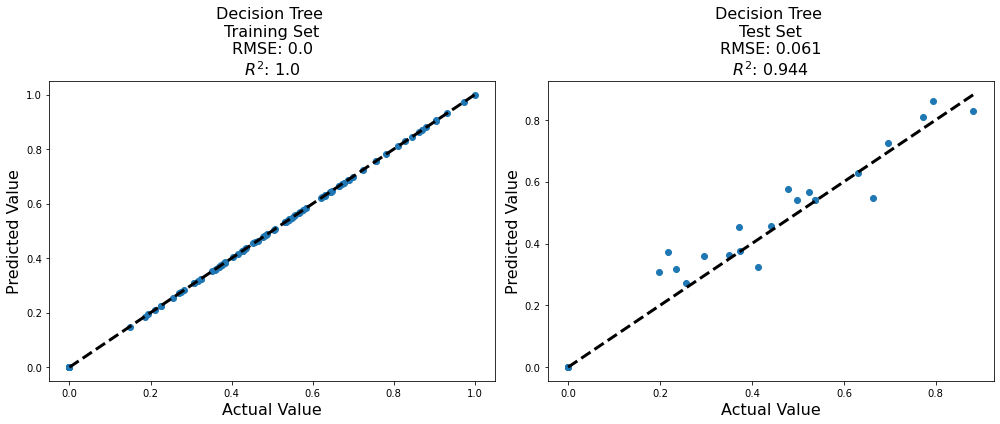

In [32]:
# Plot Predicted Value vs. Actual Value for Decision Tree Regressor

plot('Decision Tree', y_train, y_pred_train, y_test, y_pred_test)

## Random Forest Regression

In [33]:
# Random Forest Regression

# Import Regressor and RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate Regressor
rf = RandomForestRegressor(random_state = 42)

# Define Parameter Grid for subsequent Random Search
param_grid = {'n_estimators' : np.arange(100, 2100, 100),
             'max_depth' : np.arange(1, 21, 1),
             'min_samples_leaf' : np.arange(1, 21, 1)}

# Execute Random Search
regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs = -1,
                       return_train_score = True,
                       n_iter = 4000,
                       random_state = 42)

# Fit Regressor
regressor.fit(X_train, np.ravel(y_train))

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

rf_regressor = regressor

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : RandomForestRegressor(max_depth=9, n_estimators=1100, random_state=42)
Best Hyperparameter Combination: {'n_estimators': 1100, 'min_samples_leaf': 1, 'max_depth': 9}
Best Mean CV Test Score: 0.004261110167581618

Training Score (RMSE) = 0.022
Training Score (R Squared) = 0.994

Test Score (RMSE) = 0.051
Test Score (R Squared) = 0.962


In [34]:
# Store Random Forest Regression Scores

train_rmse['Random Forest Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Random Forest Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Random Forest Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Random Forest Regression'] = r2_score(y_test,y_pred_test)

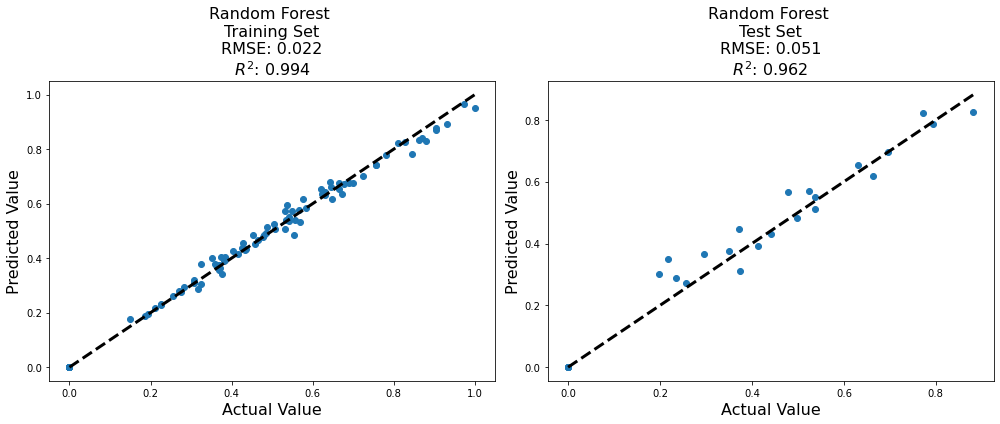

In [35]:
# Plot Predicted Value vs. Actual Value for Random Forest Regressor

plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

## Decision Trees with Gradient Boosting using XGBoost

In [36]:
# XGBoost

# Import Regressor
import xgboost as xgb

# Instantiate Regressor
xgb_reg = xgb.XGBRegressor(random_state = 42)

# Define Parameter Grid for subsequent Random Search
param_grid = {'objective':['reg:squarederror'],
             'n_estimators' : np.arange(100, 2100, 100),
             'learning_rate' : np.arange(0.01, 0.02, 0.001),
             'subsample': np.arange(0.05, 0.95, 0.05),
             'max_depth' : np.arange(1, 21, 1)}

# Execute Random Search
regressor = RandomizedSearchCV(estimator = xgb_reg,
                       param_distributions = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs=-1,
                       return_train_score=True,
                       n_iter = 18000,
                       random_state = 42)

# Fit Regressor
regressor.fit(X_train, y_train)

# Predict on Training Set
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

# Predict on Test Set
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

# Print Best Estimator, Hyperparameter Combination, Training and Test Scores
print(f'Best Estimator : {regressor.best_estimator_}')
print(f'Best Hyperparameter Combination: {regressor.best_params_}')
print(f'Best Mean CV Test Score: {-regressor.best_score_}')

print(f'\nTraining Score (RMSE) = {np.round(mean_squared_error(y_train, y_pred_train, squared=False),3)}')
print(f'Training Score (R Squared) = {np.round(r2_score(y_train, y_pred_train),3)}')

print(f'\nTest Score (RMSE) = {np.round(mean_squared_error(y_test, y_pred_test, squared=False),3)}')
print(f'Test Score (R Squared) = {np.round(r2_score(y_test, y_pred_test),3)}')

Best Estimator : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013999999999999997, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1700, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.25,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best Hyperparameter Combination: {'subsample': 0.25, 'objective': 'reg:squarederror', 'n_estimators': 1700, 'max_depth': 2, 'learning_rate': 0.013999999999999997}
Best Mean CV Test Score: 0.0031713289284413964

Training Score (RMSE) = 0.035
Training Score (R Squared) = 0.985

Test Score (RMSE) = 0.038
Test Score (R Squared) = 0.979


C:\Users\AMDM\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [37]:
sorted(zip(X_train.columns, regressor.best_estimator_.feature_importances_))

[('Residence_Time', 0.6629635),
 ('Sty wt%', 0.15416501),
 ('Sty:AIBN', 0.18287143)]

In [38]:
# Store XGBoost Regression Scores

train_rmse['Gradient Boosted Decision Trees Regression'] = mean_squared_error(y_train,y_pred_train, squared=False)
train_r2['Gradient Boosted Decision Trees Regression'] = r2_score(y_train,y_pred_train)

test_rmse['Gradient Boosted Decision Trees Regression'] = mean_squared_error(y_test,y_pred_test, squared=False)
test_r2['Gradient Boosted Decision Trees Regression'] = r2_score(y_test,y_pred_test)

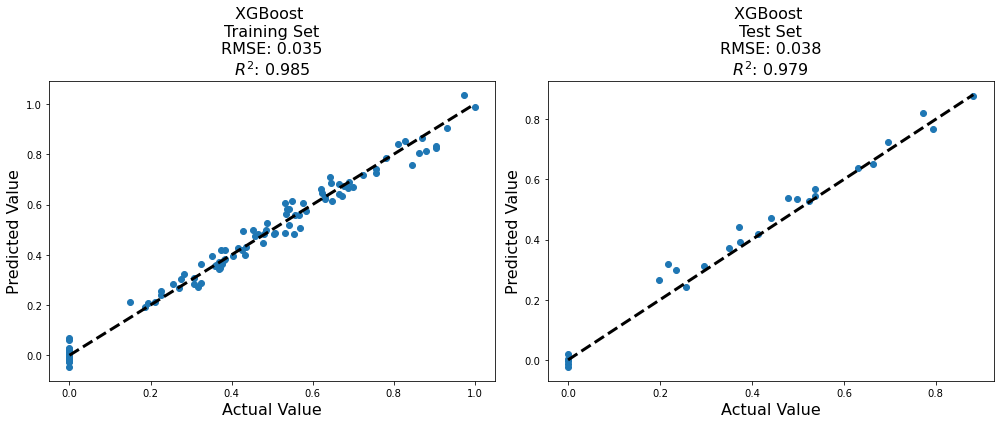

In [39]:
# Plot Predicted Value vs. Actual Value for XGBoost

plot('XGBoost', y_train, y_pred_train, y_test, y_pred_test)

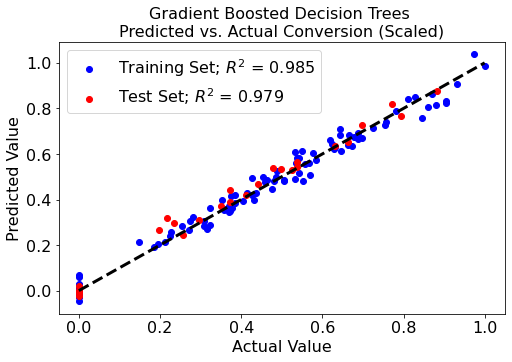

In [40]:
plt.figure(figsize = (8,5))
plt.scatter(y_train,y_pred_train, color='b', label = 'Training Set; $R^{2}$ = ' + str(np.round(r2_score(y_train, y_pred_train),3)))
plt.scatter(y_test,y_pred_test, color='r', label = 'Test Set; $R^{2}$ = ' + str(np.round(r2_score(y_test, y_pred_test),3)))    
plt.plot([0,1],[0,1],'k--', lw=3)
plt.title('Gradient Boosted Decision Trees \nPredicted vs. Actual Conversion (Scaled)', fontsize=16)
plt.xlabel('Actual Value',fontsize=16)
plt.ylabel('Predicted Value',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## ML Algorithm Performance Comparison

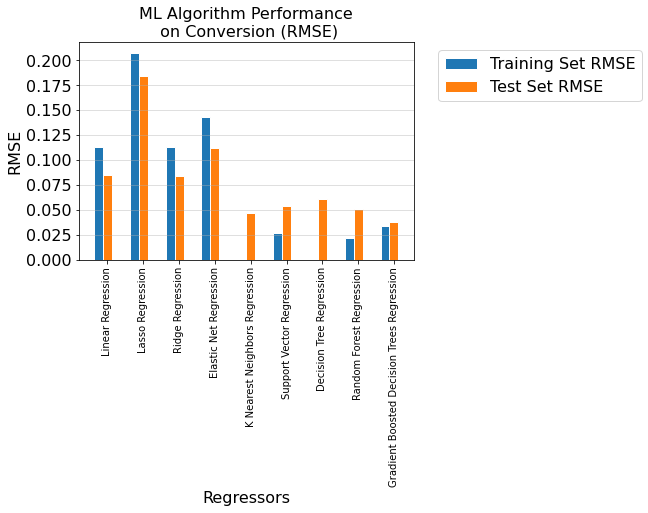

In [41]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors', fontsize=16)
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion (RMSE)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

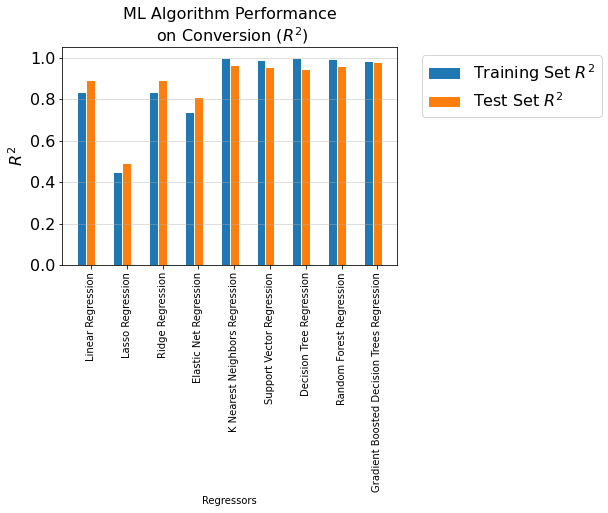

In [42]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('$R^{2}$', fontsize=16)
plt.title('ML Algorithm Performance\n on Conversion ($R^{2}$)', fontsize=16)
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

In [43]:
# Consolidate all ML algo performance metrics and save them into an excel file.

d = {'train_rmse' : train_rmse,
     'test_rmse' : test_rmse,
     'train_r2' : train_r2,
     'test_r2' : test_r2}

conv_ml_perf = pd.DataFrame(d).T
conv_ml_perf

,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net Regression,K Nearest Neighbors Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression,Gradient Boosted Decision Trees Regression
train_rmse,0.113620,0.207666,0.113715,0.142966,0.000000,0.026521,0.000000,0.022260,0.034504
test_rmse,0.085393,0.184613,0.084579,0.112182,0.047255,0.054317,0.061419,0.050589,0.037832
train_r2,0.835653,0.450987,0.835378,0.739794,1.000000,0.991046,1.000000,0.993692,0.984844
test_r2,0.891209,0.491522,0.893274,0.812243,0.966685,0.955983,0.943720,0.961818,0.978646


##  Check ML's Performance on Condition 15

In [44]:
d = {'Sty wt%': [0.7, 0.7, 0.7, 0.7, 0.7],
    'Sty:AIBN' : [200, 200, 200, 200, 200],
    'Residence_Time' : [0, 30, 60, 90, 120]}

c15 = scaler_X.transform(pd.DataFrame(d))

y_pred = regressor.predict(c15)
y_pred_abs = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_pred_abs

C:\Users\AMDM\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([[-0.20797865],
       [17.471628  ],
       [30.974195  ],
       [40.713524  ],
       [41.80171   ]], dtype=float32)

In [45]:
actual = df[df['Condition'] == 15]['Conversion'].values
actual

array([ 0.        , 16.38509095, 31.97278314, 41.54467776, 44.0452651 ])

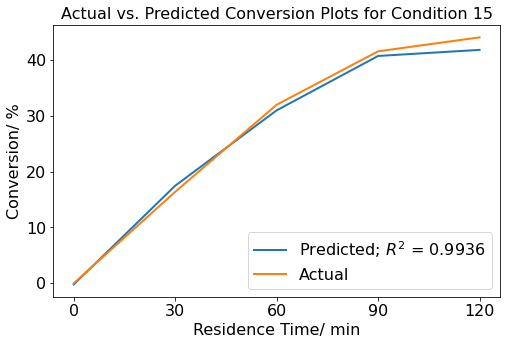

In [46]:
time = [0, 30, 60, 90, 120]
plt.figure(figsize=(8,5))
plt.plot(time, y_pred_abs, label='Predicted; $R^{2}$ = ' + str(np.round(r2_score(y_pred_abs, actual),4)), linewidth = 2)
plt.plot(time, actual, label='Actual', linewidth = 2)
plt.xlabel('Residence Time/ min', size=16)
plt.ylabel('Conversion/ %', size=16)
plt.title('Actual vs. Predicted Conversion Plots for Condition 15', size=16)
plt.xticks(time, fontsize=16)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [47]:
# Consolidate actual and predicted C15 data and save into excel file.

d = {'Predicted Conversion C15' : y_pred_abs.flatten(),
     'Actual Conversion C15' : actual}

C15_actual_pred = pd.DataFrame(d)
C15_actual_pred.index = [0,30,60,90,120]
C15_actual_pred.index.rename('Residence Time/ min', inplace = True)
C15_actual_pred

,Predicted Conversion C15,Actual Conversion C15
Residence Time/ min,,
0,-0.207979,0.000000
30,17.471628,16.385091
60,30.974195,31.972783
90,40.713524,41.544678
120,41.801708,44.045265
